In [39]:
import os
import re
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [40]:
def sorting_function(el):
    el = re.split("[._]", el)
    return int(el[1]), int(el[2])


current_directory = "assets/pack_1/"
contents = sorted(os.listdir(current_directory), key=sorting_function)

In [41]:
df = pd.DataFrame([], columns=["image", "fractal_dimension"])

In [42]:
def fractal_dimension(Z, threshold=0.9):
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
            np.arange(0, Z.shape[1], k), axis=1)
        return len(np.where((S > 0) & (S < k * k))[0])

    Z = (Z < threshold)
    p = min(Z.shape)
    n = 2 ** np.floor(np.log(p) / np.log(2))
    n = int(np.log(n) / np.log(2))
    sizes = 2 ** np.arange(n, 1, -1)
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

In [43]:
for img in contents:
    image = plt.imread(current_directory + img, 0)
    image = np.array(image * 255, dtype=np.uint8)
    image = cv2.GaussianBlur(image, (1, 1), 0)
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 21) / 255
    fractal_d = fractal_dimension(image, threshold=0.25)
    df.loc[len(df.index)] = [img, fractal_d]

In [44]:
df

,image,fractal_dimension
0,finger_1_1.png,1.732474
1,finger_1_2.png,1.687689
2,finger_1_3.png,1.712783
3,finger_1_4.png,1.599063
4,finger_1_5.png,1.603144
...,...,...
250,finger_51_1.png,1.649993
251,finger_51_2.png,1.575441
252,finger_51_3.png,1.684498
253,finger_51_4.png,1.679051


Фрактальная размерность:  1.6020102790177224


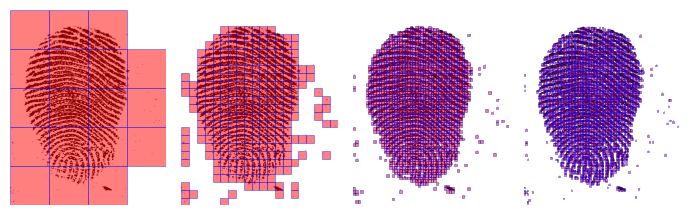

In [45]:
if __name__ == "__main__":
    Z = image

    print("Фрактальная размерность: ", fractal_dimension(Z, threshold=0.9))

    sizes = 75, 15, 5, 3
    xmin, xmax = 0, Z.shape[1]
    ymin, ymax = 0, Z.shape[0]
    fig = plt.figure(figsize=(7, 5))

    for i, size in enumerate(sizes):
        ax = plt.subplot(1, len(sizes), i + 1, frameon=False)
        ax.imshow(Z, plt.cm.pink, vmin=0, vmax=1,
                  extent=[xmin, xmax, ymin, ymax], origin="upper")
        ax.set_xticks([])
        ax.set_yticks([])
        for y in range(Z.shape[0] // size + 1):
            for x in range(Z.shape[1] // size + 1):
                s = (Z[y * size:(y + 1) * size, x * size:(x + 1) * size] > 0.25).sum()
                if s > 0 and s < size * size:
                    rect = patches.Rectangle(
                        (x * size, Z.shape[0] - 1 - (y + 1) * size),
                        width=size, height=size,
                        linewidth=.5, edgecolor="b",
                        facecolor="r", alpha=.5)
                    ax.add_patch(rect)

    plt.tight_layout()
    plt.show()